# **1. Install pycaret**

In [20]:
!pip install pycaret[full]

# **2. Check the pycaret version**

In [21]:
import pycaret
print(pycaret.__version__)

3.0.4


# **3. Get the dataset from github**

In [22]:
import pandas as pd
dataset_url = 'https://raw.githubusercontent.com/neeharikasinghsjsu/cmpe255assignments/main/Lecture2_Assignments/Assignment1/imdb_clustering.csv'
dataset = pd.read_csv(dataset_url)

# **4. Scan the dataset**

In [23]:
print("(Rows, Columns) in the dataset : ", dataset.shape, "\n\n")
dataset.head()

(Rows, Columns) in the dataset :  (2532, 9) 




,Unnamed: 0,title,director,release_year,runtime,genre,rating,metascore,gross(M)
0,0,The Shawshank Redemption,Frank Darabont,1994,142,Drama,9.3,82,28.34
1,1,The Godfather,Francis Ford Coppola,1972,175,Crime,9.2,100,134.97
2,1,The Godfather,Francis Ford Coppola,1972,175,Drama,9.2,100,134.97
3,2,The Dark Knight,Christopher Nolan,2008,152,Action,9.0,84,534.86
4,2,The Dark Knight,Christopher Nolan,2008,152,Crime,9.0,84,534.86


In [24]:
dataset.rename(columns={'Unnamed: 0': 'title_number'}, inplace=True)
dataset.head()

,title_number,title,director,release_year,runtime,genre,rating,metascore,gross(M)
0,0,The Shawshank Redemption,Frank Darabont,1994,142,Drama,9.3,82,28.34
1,1,The Godfather,Francis Ford Coppola,1972,175,Crime,9.2,100,134.97
2,1,The Godfather,Francis Ford Coppola,1972,175,Drama,9.2,100,134.97
3,2,The Dark Knight,Christopher Nolan,2008,152,Action,9.0,84,534.86
4,2,The Dark Knight,Christopher Nolan,2008,152,Crime,9.0,84,534.86


# **5. Divide the data**

In [25]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index).reset_index(drop=True)
data = data.reset_index(drop=True)

print("Data for modeling : ", data.shape)
print("Unseen data for predictions : ", data_unseen.shape)

Data for modeling :  (2405, 9)
Unseen data for predictions :  (127, 9)


In [26]:
data.head()

,title_number,title,director,release_year,runtime,genre,rating,metascore,gross(M)
0,473,Avatar,James Cameron,2009,162,Adventure,7.9,83,760.51
1,847,"South Park: Bigger, Longer & Uncut",Trey Parker,1999,81,Fantasy,7.7,73,52.04
2,12,Forrest Gump,Robert Zemeckis,1994,142,Drama,8.8,82,330.25
3,272,Hotel Rwanda,Terry George,2004,121,Drama,8.1,79,23.53
4,913,The Girl Who Leapt Through Time,Mamoru Hosoda,2006,98,Animation,7.7,66,0.00


In [27]:
data_unseen.head()

,title_number,title,director,release_year,runtime,genre,rating,metascore,gross(M)
0,2,The Dark Knight,Christopher Nolan,2008,152,Drama,9.0,84,534.86
1,5,The Lord of the Rings: The Return of the King,Peter Jackson,2003,201,Drama,9.0,94,377.85
2,7,Spider-Man: Across the Spider-Verse,Joaquim Dos Santos,2023,140,Action,8.9,86,0.00
3,24,The Green Mile,Frank Darabont,1999,189,Crime,8.6,61,136.80
4,34,It's a Wonderful Life,Frank Capra,1946,130,Drama,8.6,89,0.00


# **6. Setup**

In [28]:
from pycaret.clustering import *
s = setup(data, session_id = 123, use_gpu=True, ignore_features=['title_numer'])

,Description,Value
0,Session id,123
1,Original data shape,"(2405, 9)"
2,Transformed data shape,"(2405, 1573)"
3,Ignore features,1
4,Numeric features,6
5,Categorical features,3
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


#**7. Create Model**

In [29]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [30]:
kmeans_model = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4510,3310.0943,0.7938,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

#**8. Assign Model**

In [31]:
movie_data_cluster = assign_model(kmeans_model)
movie_data_cluster

,title_number,title,director,release_year,runtime,genre,rating,metascore,gross(M),Cluster
0,473,Avatar,James Cameron,2009,162,Adventure,7.9,83,760.510010,Cluster 2
1,847,"South Park: Bigger, Longer & Uncut",Trey Parker,1999,81,Fantasy,7.7,73,52.040001,Cluster 1
2,12,Forrest Gump,Robert Zemeckis,1994,142,Drama,8.8,82,330.250000,Cluster 2
3,272,Hotel Rwanda,Terry George,2004,121,Drama,8.1,79,23.530001,Cluster 3
4,913,The Girl Who Leapt Through Time,Mamoru Hosoda,2006,98,Animation,7.7,66,0.000000,Cluster 1
...,...,...,...,...,...,...,...,...,...,...
2400,103,Reservoir Dogs,Quentin Tarantino,1992,99,Crime,8.3,81,2.830000,Cluster 3
2401,891,Night on Earth,Jim Jarmusch,1991,129,Comedy,7.7,68,2.020000,Cluster 1
2402,780,Airplane!,Jim Abrahams,1980,88,Comedy,7.7,78,83.400002,Cluster 1
2403,986,From Here to Eternity,Fred Zinnemann,1953,118,Romance,7.6,85,30.500000,Cluster 1


#**9. Analyze Model**

In [32]:
plot_model(kmeans_model, plot = 'cluster')


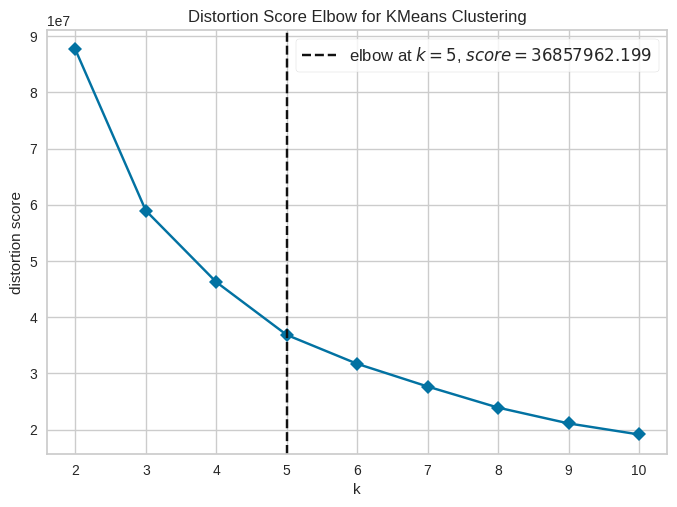

In [33]:
plot_model(kmeans_model, plot = 'elbow')


In [34]:
plot_model(kmeans_model, plot = 'tsne')


In [35]:
plot_model(kmeans_model, plot = 'distribution')

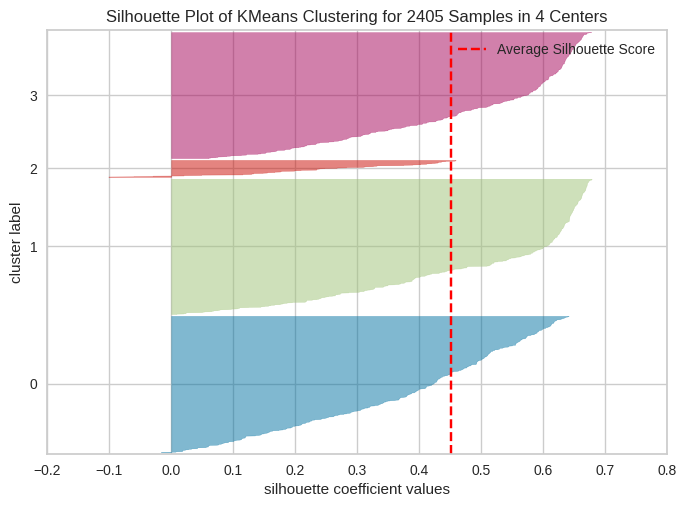

In [36]:
plot_model(kmeans_model, plot = 'silhouette')





# **10. Prediction**

In [37]:
data.head()


,title_number,title,director,release_year,runtime,genre,rating,metascore,gross(M)
0,473,Avatar,James Cameron,2009,162,Adventure,7.9,83,760.51
1,847,"South Park: Bigger, Longer & Uncut",Trey Parker,1999,81,Fantasy,7.7,73,52.04
2,12,Forrest Gump,Robert Zemeckis,1994,142,Drama,8.8,82,330.25
3,272,Hotel Rwanda,Terry George,2004,121,Drama,8.1,79,23.53
4,913,The Girl Who Leapt Through Time,Mamoru Hosoda,2006,98,Animation,7.7,66,0.00


In [19]:
kmeans_pred = predict_model(model=kmeans_model, data=data)
kmeans_pred

,title_number,title_Avatar,"title_South Park: Bigger, Longer & Uncut",title_Forrest Gump,title_Hotel Rwanda,title_The Girl Who Leapt Through Time,title_Billy Elliot,title_The Bandit,title_Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb,title_Kiki's Delivery Service,...,genre_Film-Noir,genre_History,genre_Horror,genre_Musical,genre_Sport,genre_Western,rating,metascore,gross(M),Cluster
0,-0.105203,28.296054,-0.035341,-0.028849,-0.035341,-0.035341,-0.028849,-0.035341,-0.020395,-0.035341,...,-0.091574,-0.136514,-0.116125,-0.079222,-0.07652,-0.084374,-0.233880,0.541868,6.125538,Cluster 0
1,1.189677,-0.035341,28.296054,-0.028849,-0.035341,-0.035341,-0.028849,-0.035341,-0.020395,-0.035341,...,-0.091574,-0.136514,-0.116125,-0.079222,-0.07652,-0.084374,-0.967231,0.214548,-0.086638,Cluster 0
2,-1.701299,-0.035341,-0.035341,34.662660,-0.035341,-0.035341,-0.028849,-0.035341,-0.020395,-0.035341,...,-0.091574,-0.136514,-0.116125,-0.079222,-0.07652,-0.084374,3.066200,0.509136,2.352829,Cluster 0
3,-0.801115,-0.035341,-0.035341,-0.028849,28.296054,-0.035341,-0.028849,-0.035341,-0.020395,-0.035341,...,-0.091574,-0.136514,-0.116125,-0.079222,-0.07652,-0.084374,0.499471,0.410940,-0.336626,Cluster 0
4,1.418185,-0.035341,-0.035341,-0.028849,-0.035341,28.296054,-0.028849,-0.035341,-0.020395,-0.035341,...,-0.091574,-0.136514,-0.116125,-0.079222,-0.07652,-0.084374,-0.967231,-0.014576,-0.542947,Cluster 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2400,-1.386234,-0.035341,-0.035341,-0.028849,-0.035341,-0.035341,-0.028849,-0.035341,-0.020395,-0.035341,...,-0.091574,-0.136514,-0.116125,-0.079222,-0.07652,-0.084374,1.232823,0.476404,-0.518133,Cluster 0
2401,1.342016,-0.035341,-0.035341,-0.028849,-0.035341,-0.035341,-0.028849,-0.035341,-0.020395,-0.035341,...,-0.091574,-0.136514,-0.116125,-0.079222,-0.07652,-0.084374,-0.967231,0.050888,-0.525235,Cluster 0
2402,0.957706,-0.035341,-0.035341,-0.028849,-0.035341,-0.035341,-0.028849,-0.035341,-0.020395,-0.035341,...,-0.091574,-0.136514,-0.116125,-0.079222,-0.07652,-0.084374,-0.967231,0.378208,0.188340,Cluster 0
2403,1.670929,-0.035341,-0.035341,-0.028849,-0.035341,-0.035341,-0.028849,-0.035341,-0.020395,-0.035341,...,-0.091574,-0.136514,-0.116125,-0.079222,-0.07652,-0.084374,-1.333906,0.607332,-0.275510,Cluster 0


# **11. Predict on Unseen data**

In [ ]:
unseen_predictions = predict_model(kmeans_model, data=data_unseen)
unseen_predictions.head(50)

,title_number,title_Avatar,"title_South Park: Bigger, Longer & Uncut",title_Forrest Gump,title_Hotel Rwanda,title_The Girl Who Leapt Through Time,title_Billy Elliot,title_The Bandit,title_Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb,title_Kiki's Delivery Service,...,genre_Film-Noir,genre_History,genre_Horror,genre_Musical,genre_Sport,genre_Western,rating,metascore,gross(M),Cluster
0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.0,84.0,534.86,Cluster 2
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.0,94.0,377.85,Cluster 2
2,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.9,86.0,0.00,Cluster 3
3,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.6,61.0,136.80,Cluster 3
4,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.6,89.0,0.00,Cluster 3
5,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.6,85.0,0.00,Cluster 3
6,38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.5,85.0,132.38,Cluster 3
7,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.5,96.0,53.37,Cluster 3
8,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.5,62.0,6.72,Cluster 3
9,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.5,85.0,32.57,Cluster 3


# **12. Saving the model**

In [ ]:
save_model(kmeans_model,'movie_recommendation_model_V1')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['title_number', 'release_year',
                                              'runtime', 'rating', 'metascore',
                                              'gross(M)'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['title', 'director', 'genre'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['title', 'director', 'genre'],
                                     transformer=OneHotEncoder(cols=['title',
                                                                     'director',
                                                                     'genre'],
                                                               

# **12. Load the saved model (for future analysis)**

In [ ]:
loaded_movie_recommendation_model = load_model('movie_recommendation_model_V1')
loaded_movie_recommendation_model